In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\m\AppData\Local\Programs\Python\Python36-32\titanic\train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


## Ticket Class

#### Survivors per Ticket Class

In [7]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5,1,'Percentage of survivors in each Class')

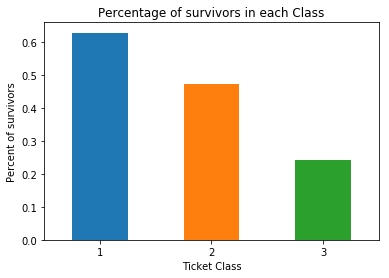

In [8]:
df.groupby('Pclass').Survived.mean().plot(kind='bar', rot=0)
plt.xlabel('Ticket Class')
plt.ylabel('Percent of survivors')
plt.title("Percentage of survivors in each Class")

#### Passengers by gender in each Ticket Class

In [9]:
pd.crosstab(df.Pclass, df.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0.5,1,'Number of passengers in each class by Gender')

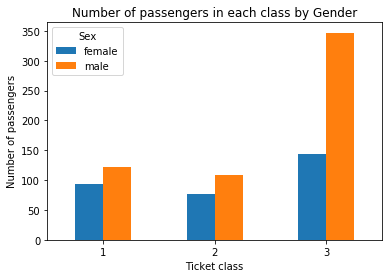

In [10]:
pd.crosstab(df.Pclass, df.Sex).plot(kind='bar', rot=0)
plt.xlabel('Ticket class')
plt.ylabel('Number of passengers')
plt.title('Number of passengers in each class by Gender')

## Gender

#### Survivors per Gender

In [11]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(0.5,1,'Percentage of survivors by Gender')

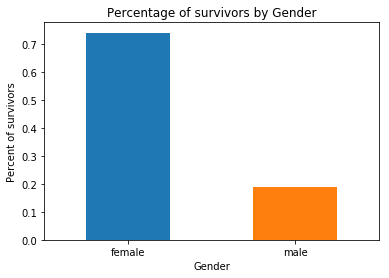

In [12]:
df.groupby('Sex').Survived.mean().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Gender')

#### Survivors by Gender in each Ticket class

In [13]:
pd.crosstab([df.Sex, df.Pclass], df.Survived)

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

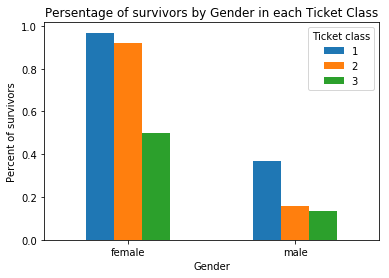

In [38]:
df.groupby(['Sex', 'Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Persentage of survivors by Gender in each Ticket Class')
plt.legend(title='Ticket class')

## Age

#### Survivors under age of 18 by Gender in each Ticket class

In [15]:
age = 18
df[df.Age < age].groupby(['Sex','Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.875,1.000000,0.542857
male,1.000,0.818182,0.232558


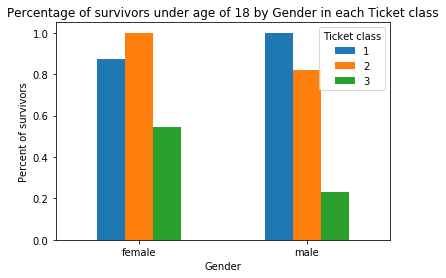

In [37]:
df[df.Age < age].groupby(['Sex','Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors under age of {} by Gender in each Ticket class'.format(age))
plt.legend(title='Ticket class', loc=1)

#### Survivors by Age group
- child,  0-17 yo
- adult,  18-59 yo
- elderly,  60+ yo

In [17]:
def age_group(age):
    age_group = {'child': (0, 18),
                 'adult': (18, 60), 
                 'elderly': (60, 120)}
    for group, age_range in age_group.items():
        if age >= age_range[0] and age < age_range[1]:
            return group
df['Age_group'] = df.Age.map(age_group, na_action='ignore')
df['Age_group'] = pd.Categorical(df.Age_group, ordered=True, 
                                 categories=['child', 'adult', 'elderly'])

In [18]:
pd.crosstab(df.Age_group, df.Survived)

Survived,0,1
Age_group,,
child,52,61
adult,353,222
elderly,19,7


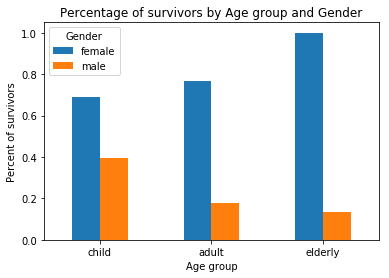

In [35]:
df.groupby(['Age_group', 'Sex']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Age group')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Age group and Gender')
plt.legend(title='Gender')

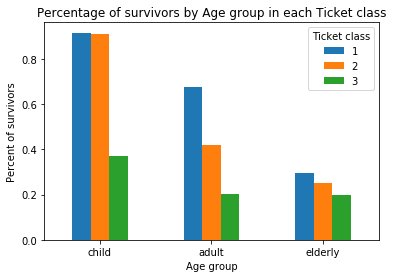

In [34]:
df.groupby(['Age_group', 'Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Age group')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Age group in each Ticket class')
plt.legend(title='Ticket class')

## Embarkation Port

#### Number of passengers embarked in each port

In [21]:
pd.crosstab(df.Embarked, df.Pclass)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


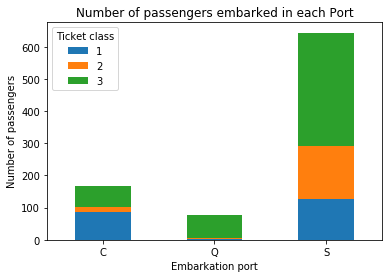

In [33]:
pd.crosstab(df.Embarked, df.Pclass).plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Embarkation port')
plt.ylabel('Number of passengers')
plt.title('Number of passengers embarked in each Port')
plt.legend(title='Ticket class')

#### Survivors by Embarkation port

In [27]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


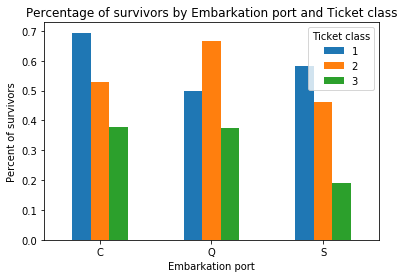

In [32]:
df.groupby(['Embarked', 'Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Embarkation port')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Embarkation port and Ticket class')
plt.legend(title='Ticket class')